## Talos-POC Demo (Notebook)

- 输入 1 条用户消息
- Graph 运行到 `interrupt()` 时自动批准（`approval=True`）
- 打印 `__interrupt__` payload 与最终 `final_state`

> 依赖外部 LLM/环境变量时，请提前确认本机环境已配置好（比如 `.env`）。



In [ ]:
from __future__ import annotations

import uuid
from typing import Any

from langchain_core.messages import AnyMessage, HumanMessage
from langgraph.types import Command

from src.main import talos_agent
from src.models.operation import OperationResumePayload
from src.utils.tools import _pretty


def run_once(
    *,
    conversation: list[AnyMessage],
    thread_id: str,
    auto_approve: bool = True,
    comment: str = "",
) -> dict[str, Any]:
    config: Any = {"configurable": {"thread_id": thread_id}}

    next_input: Any = {
        "user_input": list(conversation),
        "messages": list(conversation),
    }

    while True:
        interrupt_payload: Any | None = None
        last_state: dict[str, Any] | None = None

        for state in talos_agent.stream(next_input, config=config, stream_mode="values"):
            last_state = state
            if "__interrupt__" in state:
                interrupt_payload = state["__interrupt__"]
                break

        if interrupt_payload is None:
            return last_state or {}

        print("\n--- HUMAN REVIEW REQUIRED ---")
        print(_pretty(interrupt_payload))

        if not auto_approve:
            raise RuntimeError("Graph requested human approval; set auto_approve=True to continue in this demo.")

        resume = OperationResumePayload(approval=True, comment=comment or None, data=None)
        next_input = Command(resume=resume.model_dump())


def run_demo(user_text: str) -> dict[str, Any]:
    thread_id = f"notebook-{uuid.uuid4()}"
    conversation: list[AnyMessage] = [HumanMessage(content=user_text)]

    final_state = run_once(conversation=conversation, thread_id=thread_id, auto_approve=True)

    print("\n--- FINAL STATE ---")
    print(_pretty(final_state))

    return final_state

In [ ]:
sample = "我正在进行水杨酸 (Salicylic Acid) 的 乙酰化反应 制备乙酰水杨酸 (Aspirin)。需要进行中控监测 (IPC)"

_ = run_demo(sample)

2025-12-31 00:57:42.081 | INFO     | src.agents.tlc_agent:__init__:97 - TLCAgent initialized with model=profile={'max_input_tokens': 400000, 'max_output_tokens': 128000, 'image_inputs': True, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': True, 'tool_calling': True, 'structured_output': True, 'image_url_inputs': True, 'pdf_inputs': True, 'pdf_tool_message': True, 'image_tool_message': True, 'tool_choice': True} client=<openai.resources.chat.completions.completions.Completions object at 0x1137d8110> async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x1137d83b0> root_client=<openai.OpenAI object at 0x1137d80b0> root_async_client=<openai.AsyncOpenAI object at 0x1137d8170> model_name='gpt-5-mini' model_kwargs={} openai_api_key=SecretStr('**********') openai_api_base='https://yunwu.ai/v1' seed=42
2025-12-31 00:57:42.090 | INFO     | src.functions.admittance:__init_

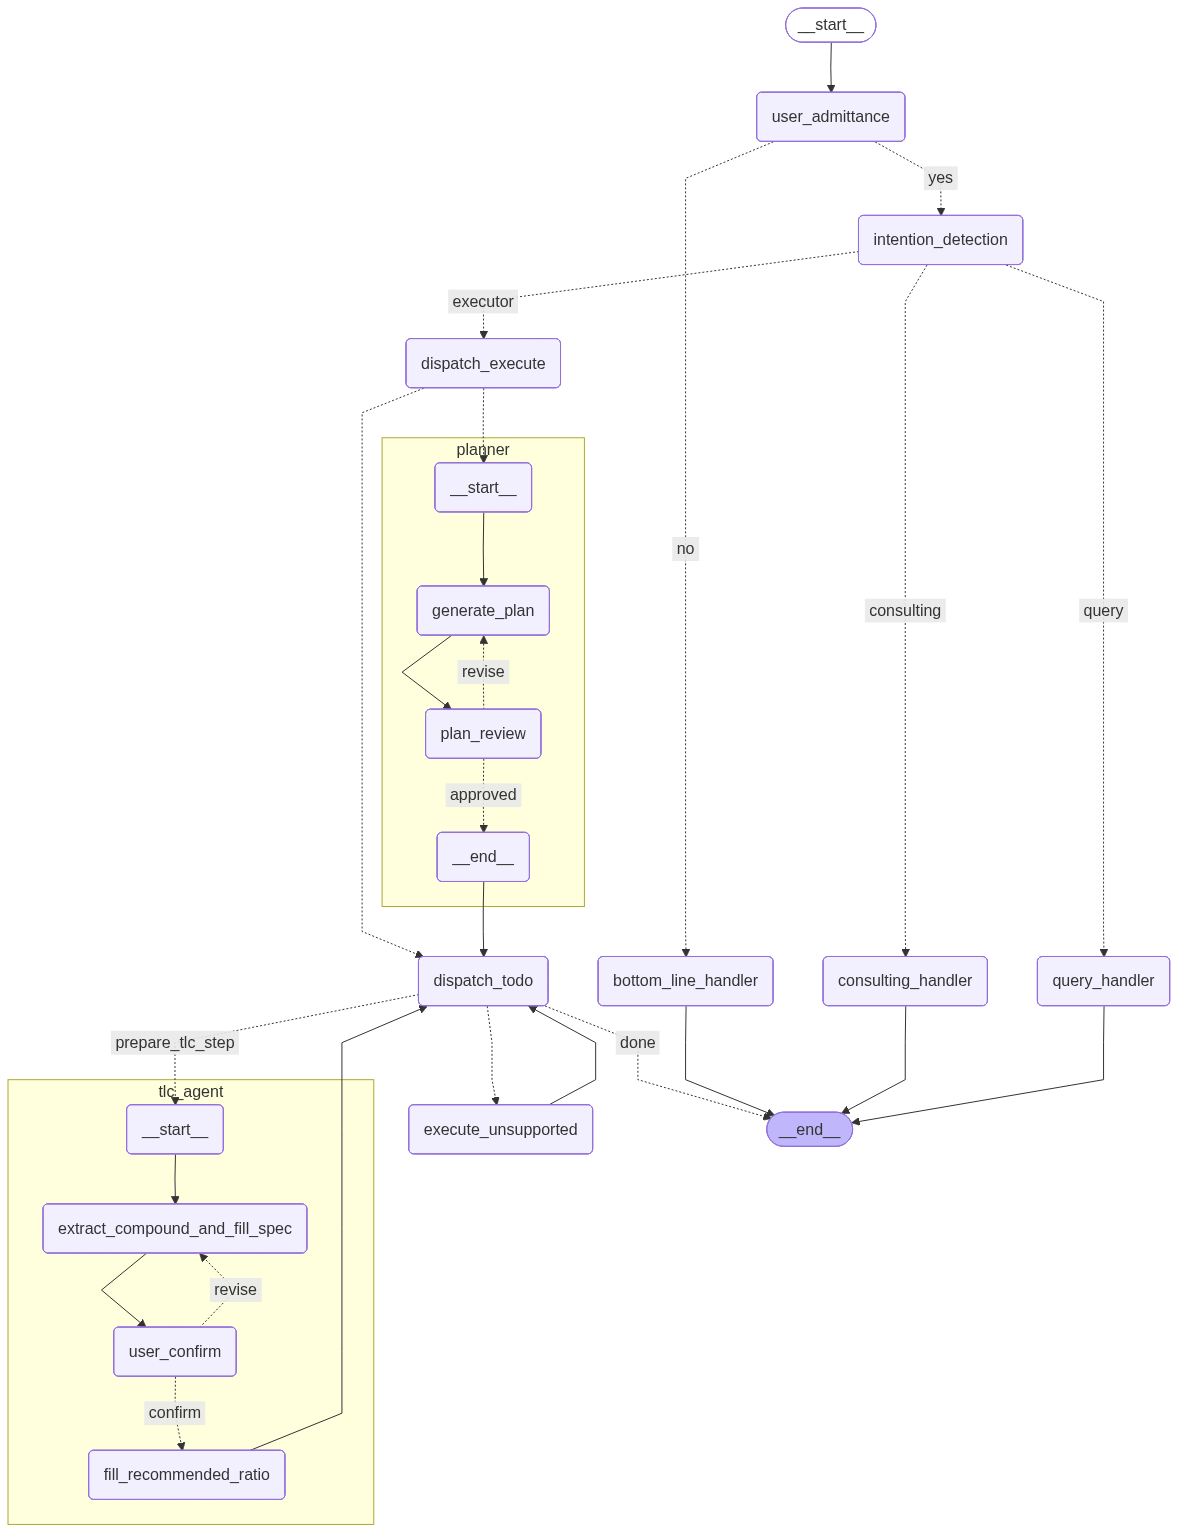

In [1]:
import sys

sys.path.append("/Users/drakezhou/Development/big-poc")
sys.path.append("/Users/drakezhou/Development/big-poc/src")

from main import _export_workflow_png

_export_workflow_png()

In [2]:
from langchain_core.messages import SystemMessage, HumanMessage, AIMessage


# hm = HumanMessage(content="This is human msg")

# sm = SystemMessage(content="This is system msg", *hm)



am = AIMessage(content="This is ai msg", additional_kwargs={"display_type": "thinking"})



print(am)



content='This is ai msg' additional_kwargs={'display_type': 'thinking'} response_metadata={}
